In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Reading in data

In [2]:
mitbih_train_df = pd.read_csv("../data/mitbih/mitbih_train.csv", header=None)
mitbih_test_df = pd.read_csv("../data/mitbih/mitbih_test.csv", header=None)

In [3]:
mitbih_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
mitbih_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Looking at data distribution

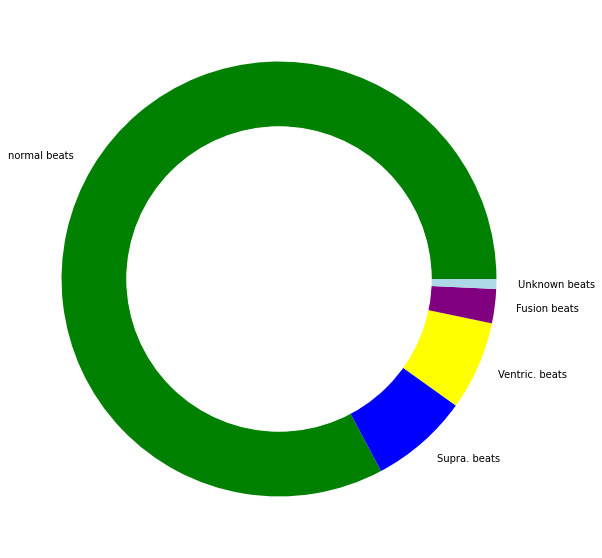

In [5]:
mitbih_train_df[187] = mitbih_train_df[187].astype(int)
count = mitbih_train_df[187].value_counts()

plt.figure(figsize=(10, 10))
pie = plt.Circle((0, 0), 0.7, color="white")
plt.pie(count, labels=["normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"], colors=["green", "blue", "yellow", "purple", "lightblue"])
p = plt.gcf()
p.gca().add_artist(pie)
plt.show()

## Looking at the ECG-signals for the different classes

In [6]:
samples = mitbih_train_df.groupby(187, group_keys=False).apply(lambda mitbih_train_df: mitbih_train_df.sample(1))
samples

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
25220,0.000000,0.133333,0.251515,0.400000,0.481818,0.575758,0.690909,0.760606,0.754545,0.778788,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72555,1.000000,0.984190,0.268775,0.000000,0.166008,0.201581,0.150198,0.221344,0.256917,0.229249,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
76741,0.821229,0.864060,0.791434,0.746741,0.715084,0.726257,0.767225,0.729981,0.502793,0.268156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81093,1.000000,0.888136,0.471186,0.257627,0.213559,0.191525,0.181356,0.167797,0.164407,0.157627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
87253,0.904943,0.429658,0.460076,0.486692,0.494297,0.490494,0.494297,0.479087,0.365019,0.231939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


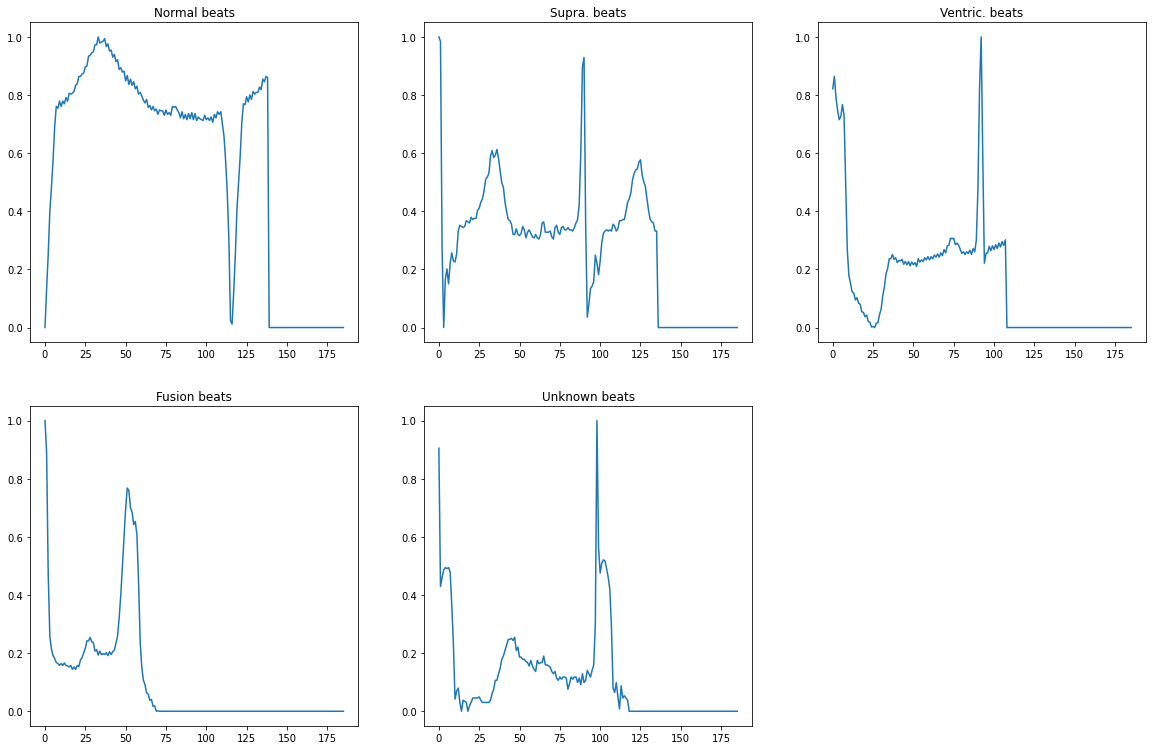

In [7]:
plt.figure(figsize=(20, 20))
for i, name in enumerate(["Normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]):
    plt.subplot(3,3,i+1)
    plt.plot(samples.iloc[i,:186])
    plt.title(name)

## Time series heatmap for the different classes

In [8]:
def heatmap(class_label, min_val, size, title):
    img = mitbih_train_df.loc[mitbih_train_df[187]==class_label].values
    img = img[:, min_val:size]
    img_flatten = img.flatten()

    final = np.arange(min_val, size)
    for _ in range(img.shape[0]-1):
        tempo = np.arange(min_val, size)
        final = np.concatenate((final, tempo), axis=None)
    plt.hist2d(final, img_flatten, bins=(65, 65), cmap=plt.cm.jet)
    plt.title('2D Histogram - '+ title)

In [21]:
plt.figure(figsize=(20, 20))
for i, name in enumerate(["Normal beats", "Supra. beats", "Ventric. beats", "Fusion beats", "Unknown beats"]):
    plt.subplot(3,3,i+1)
    heatmap(i, 5, 70, name)
plt.show()

KeyboardInterrupt: 